# Train a Vision Transformer using Transfer Learning

In [1]:
import os
import torch
import torch.utils.data as data_utils
from random import randint
import matplotlib.pyplot as plt
from utils.denormalize_image import denormalize_image

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Running on device: {device}')

Running on device: cpu


### Constants

In [3]:
FACES_FOLDER = os.path.join("data", "faces")
FACES_CSV = os.path.join(FACES_FOLDER, "faces.csv")
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
CLASS_NAMES = ["real", "fake"]

### Data Preparation

In [4]:
from dataset.faces import Faces

In [5]:
# Take the dataset minus a certain % for training
train_dataset_full = Faces(root=FACES_FOLDER, csv=FACES_CSV, split="training", transform=True)
train_split_num_list = torch.arange(0, round((1 - VALIDATION_SPLIT) * len(train_dataset_full)))
train_dataset = data_utils.Subset(train_dataset_full, train_split_num_list)

# Take just a % of the dataset for validation
val_dataset_full = Faces(root=FACES_FOLDER, csv=FACES_CSV, split="validation", transform=True)
val_split_num_list = torch.arange(len(train_dataset), len(val_dataset_full))
val_dataset = data_utils.Subset(val_dataset_full, val_split_num_list)

print(f"Total dataset size: {len(train_dataset_full)}",
      f"Training dataset size {round((len(train_dataset) / len(train_dataset_full)) * 100)}%: {len(train_dataset)}",
      f"Validation dataset size {round((len(val_dataset) / len(train_dataset_full)) * 100)}%: {len(val_dataset)}", sep="\n")

Total dataset size: 8267
Training dataset size 80%: 6614
Validation dataset size 20%: 1653


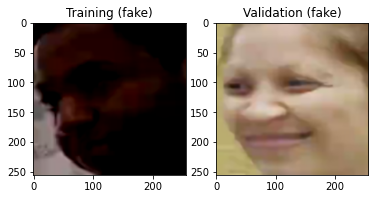

In [6]:
# plot some images
train_image, train_label = train_dataset[randint(0, len(train_dataset)-1)]
val_image, val_label = val_dataset[randint(0, len(val_dataset)-1)]
train_image = denormalize_image(train_image)
val_image = denormalize_image(val_image)

plt.subplot(1, 2, 1)
plt.title(f"Training ({train_label})")
plt.imshow(train_image)
plt.subplot(1, 2, 2)
plt.title(f"Validation ({val_label})")
plt.imshow(val_image)
plt.show()

In [7]:
# Create the Data Loaders for the train_dataset and val_dataset
train_loader = data_utils.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = data_utils.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

### Train the model